# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    params = {
        "q": city,
        "appid": weather_api_key,
        "units": "metric"  # You can change units to imperial for Fahrenheit
    }

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(url, params=params)
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikel
Processing Record 2 of Set 1 | shingu
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | monteagudo
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | tevragh zeina
City not found. Skipping...
Processing Record 8 of Set 1 | hirara
Processing Record 9 of Set 1 | salym
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | youhao
Processing Record 14 of Set 1 | kruisfontein
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | papao
Processing Record 18 of Set 1 | mont-dore
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | ternate
Processing Record 21 of Set 1 | at taj
Processing Record 22 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nikel,69.4128,30.2220,-5.90,88,100,2.73,RU,1712417670
1,shingu,33.7333,135.9833,13.80,89,98,1.45,JP,1712417670
2,albany,42.6001,-73.9662,6.97,69,94,2.68,US,1712417401
3,monteagudo,-19.8167,-63.9833,28.18,54,74,3.45,BO,1712417670
4,margaret river,-33.9500,115.0667,16.87,69,13,5.02,AU,1712417670


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikel,69.4128,30.2220,-5.90,88,100,2.73,RU,1712417670
1,shingu,33.7333,135.9833,13.80,89,98,1.45,JP,1712417670
2,albany,42.6001,-73.9662,6.97,69,94,2.68,US,1712417401
3,monteagudo,-19.8167,-63.9833,28.18,54,74,3.45,BO,1712417670
4,margaret river,-33.9500,115.0667,16.87,69,13,5.02,AU,1712417670


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

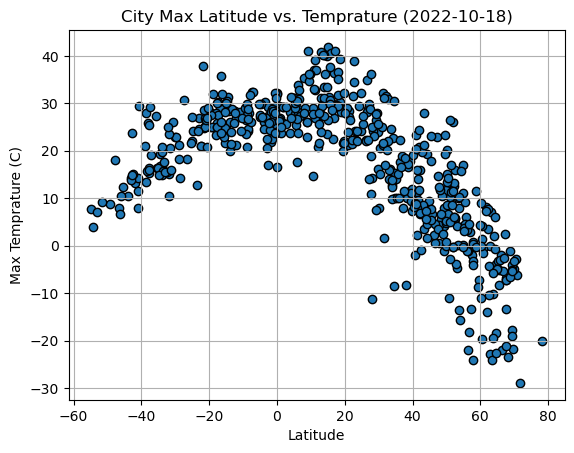

In [18]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df['Lat']
tmp = city_data_df['Max Temp']
plt.scatter(lat,tmp, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temprature (C)')
plt.title('City Max Latitude vs. Temprature (2022-10-18)')
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

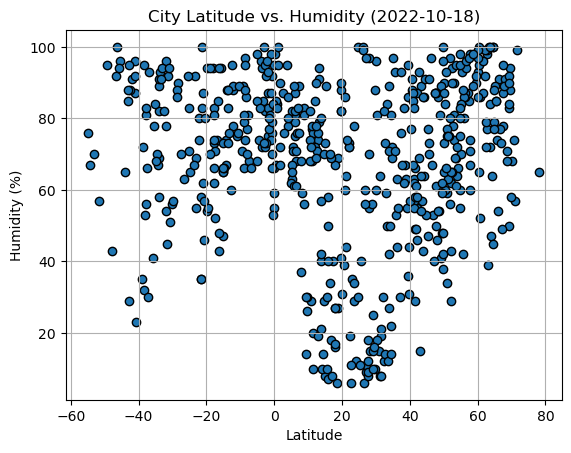

In [21]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(lat,humidity, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

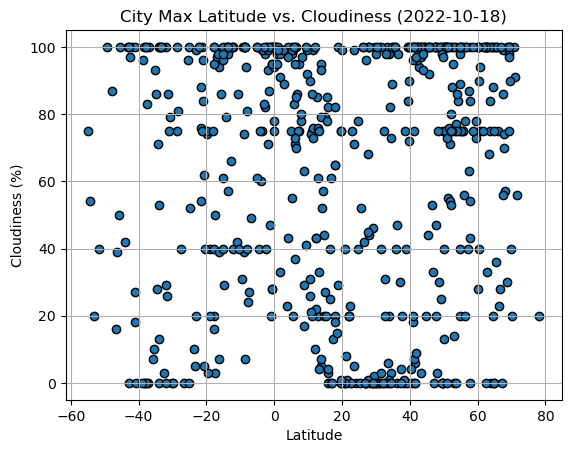

In [24]:
# Build the scatter plots for latitude vs. cloudiness
clouds = city_data_df['Cloudiness']
plt.scatter(lat,clouds, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

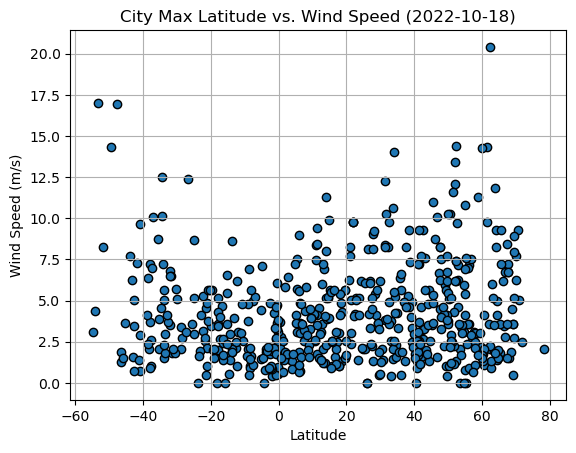

In [25]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df['Wind Speed']
plt.scatter(lat,wind, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2022-10-18)')
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
x_val = lat
y_val = tmp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nikel,69.4128,30.2220,-5.90,88,100,2.73,RU,1712417670
1,shingu,33.7333,135.9833,13.80,89,98,1.45,JP,1712417670
2,albany,42.6001,-73.9662,6.97,69,94,2.68,US,1712417401
6,hirara,24.8000,125.2833,24.15,100,40,2.06,JP,1712417671
7,salym,60.0625,71.4789,-10.95,93,28,1.82,RU,1712417671


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,monteagudo,-19.8167,-63.9833,28.18,54,74,3.45,BO,1712417670
4,margaret river,-33.9500,115.0667,16.87,69,13,5.02,AU,1712417670
5,mar del plata,-38.0023,-57.5575,25.85,53,0,7.20,AR,1712417545
9,grytviken,-54.2811,-36.5092,3.88,67,54,4.39,GS,1712417672
10,adamstown,-25.0660,-130.1015,22.08,71,100,2.96,PN,1712417629


###  Temperature vs. Latitude Linear Regression Plot

R squared: -0.8429835976910748


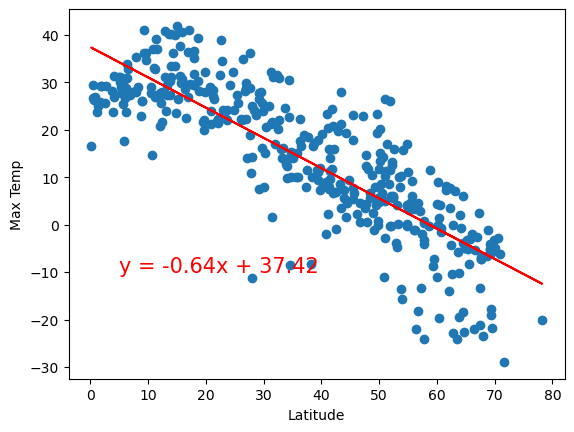

In [43]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(north_lat,north_temp)

# Plot regression line
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue}")

R squared: 0.7172046847131658


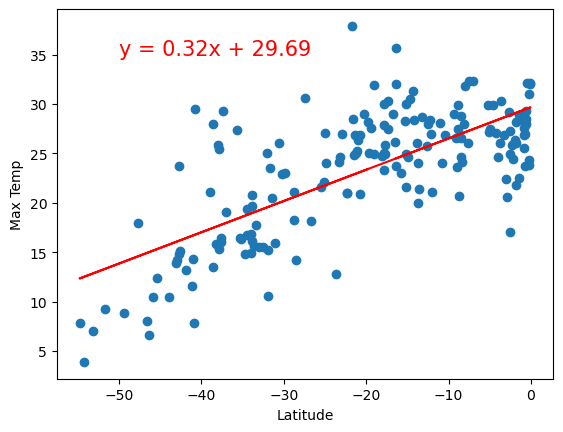

In [55]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat'].values.reshape(-1, 1)  # Reshape to 2D array
south_tmp = southern_hemi_df['Max Temp'].values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.flatten(), south_tmp)  # Flatten south_lat to 1D array
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(south_lat, south_tmp)

# Plot regression line
plt.plot(south_lat, regress_values, "r-")
plt.annotate(line_eq, xy= (-50,35), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r square value
print(f"R squared: {rvalue}")


**Discussion about the linear relationship:** As one can expect, the southern hemisphere latitudes face higher max temperature trends versus norther hemisphere. This invesrse relation can be due to lack of mountainous land in the southern hemisphere, as mountains create cool tempratures.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.276395426987123


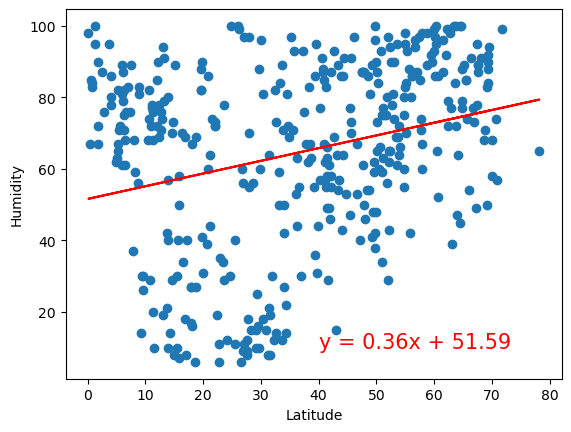

In [56]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_hum = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_hum)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(north_lat,north_hum)

# Plot regression line
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue}")

R squared: 0.1363754412738605


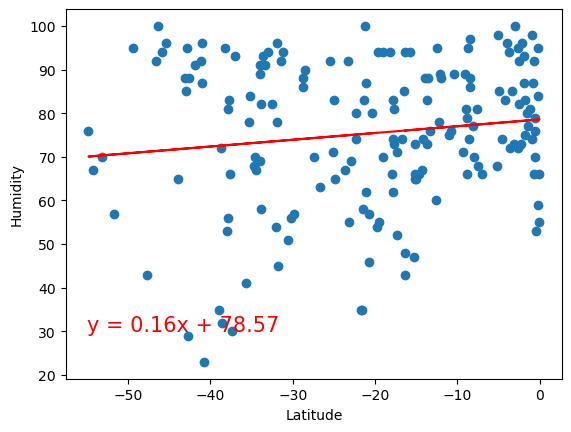

In [62]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat'].values.reshape(-1, 1)  # Reshape to 2D array
south_hum = southern_hemi_df['Humidity'].values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.flatten(), south_hum)  # Flatten south_lat to 1D array
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(south_lat, south_hum)

# Plot regression line
plt.plot(south_lat, regress_values, "r-")
plt.annotate(line_eq, xy= (-55,30), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue}")


**Discussion about the linear relationship:** the northern hemisphere seemed to have a slightly higher correlation when it comes to Humidity versus south hemisphere. This slight increase can be due to summers in the Norther hemisphere being more heat which could increase evaporation rate.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.1267904945093111


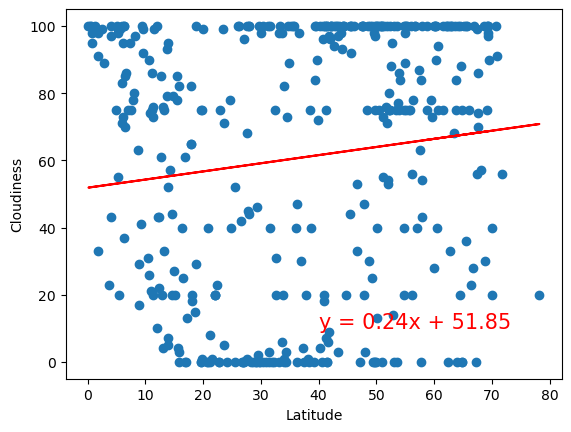

In [63]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_cld = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cld)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(north_lat,north_cld)

# Plot regression line
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue}")

R squared: 0.24024070003748282


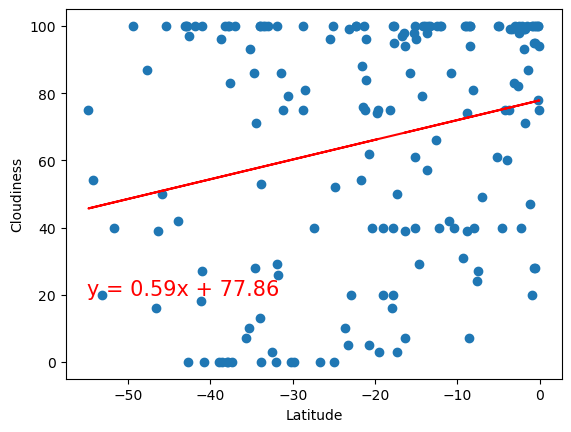

In [66]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat'].values.reshape(-1, 1)  # Reshape to 2D array
south_cld = southern_hemi_df['Cloudiness'].values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.flatten(), south_cld)  # Flatten south_lat to 1D array
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(south_lat, south_cld)

# Plot regression line
plt.plot(south_lat, regress_values, "r-")
plt.annotate(line_eq, xy= (-55,20), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue}")

**Discussion about the linear relationship:** Southern Hempisphere latitudes had a slightly higher correlation of cloudiness. This minor increase can be linked to the southern hemisphere having more water compared to land mass which can result cloud formation over such regions.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.12539485237483827


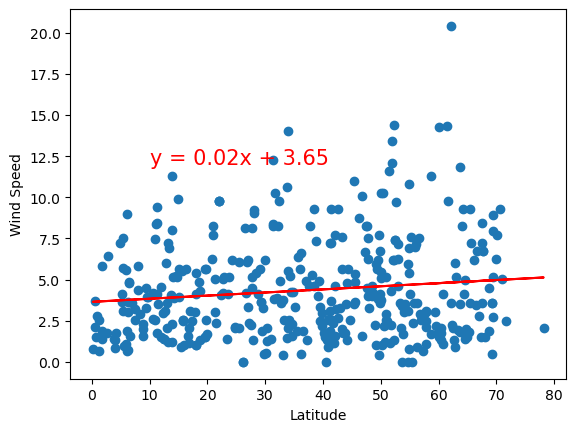

In [65]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_wind = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(north_lat,north_wind)

# Plot regression line
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue}")

R squared: -0.38706448247649566


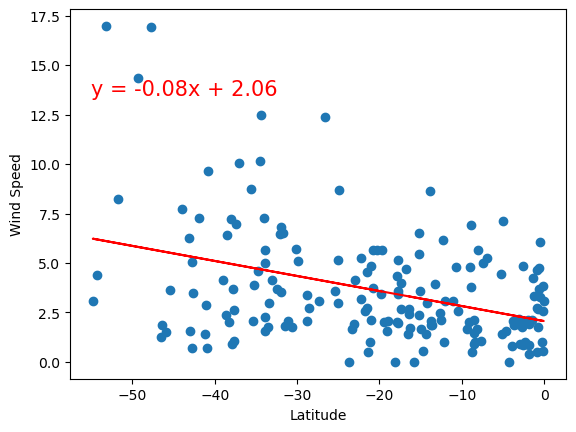

In [70]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat'].values.reshape(-1, 1)  # Reshape to 2D array
south_wind = southern_hemi_df['Wind Speed'].values
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat.flatten(), south_wind)  # Flatten south_lat to 1D array
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot scatter plot
plt.scatter(south_lat, south_wind)

# Plot regression line
plt.plot(south_lat, regress_values, "r-")
plt.annotate(line_eq, xy= (-55,13.5), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue}")

**Discussion about the linear relationship:** from the scatters we can asses that southern latitudes faced lower wind speeds compared to their northern counterparts. This can be attributed to the land distribution, as many mountainous areas like the Alps and the Rockies are located in the northern hemisphere.